# Uge 8: Riemann-Integraler i flere dimensioner og variabelskift

Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

## Python funktioner til parametriseringer

Når vi arbejder med variableskift kan vi med fordel anvende at Python- og lambda-funktioner kan håndtere SymPy-objekter. For at illustrere hvordan dette kan anvendes ser vi på eksemplet

\begin{equation*}
f: \mathbb{R}^3 \to \mathbb{R}, \quad f(x,y,z) = x+y+z
\end{equation*}

\begin{equation*}
\boldsymbol{r}(u,v,w) = \begin{bmatrix} u -v \\ w^2 \\ v(u+w) \end{bmatrix}, \quad u,v,w \in \mathbb{R}
\end{equation*}

Vi vil gerne bestemme $f(\boldsymbol{r}(u,v,w))$.

Til dette definere vi nu $f$ som hhv. en SymPy-expression (variabel), en standard python-funktion og en lambda-funktion

In [2]:
x,y,z = symbols('x,y,z', real =True)
u,v,w = symbols('u,v,w', real =True)

# Parameterfunktion
r = Matrix([u -v, w**2, v*(u+w)])

# Funktioner
f_sym = x+y+z

def f_function(x,y,z):
    return x+y+z

f_lam = lambda x,y,z : x+y+z

Som SymPy-expression kan $f(\boldsymbol{r}(u,v,w))$ opnås ved

In [3]:
fr_sym = f_sym.subs(zip((x,y,z), r)).simplify()

Med Python- og lambda-funktionen kan vi i stedet slippe afsted med

In [4]:
fr_function = f_function(*r).simplify()
fr_lam = f_lam(*r).simplify()

**Det er dog vigtigt at man husker `*`!** Dette fortæller python at koordinaterne i $\boldsymbol{r}$ skal gives til funktionen som individuelle argumenter

In [5]:
fr_sym, fr_function, fr_lam

## Integration af områder begrænset af rette linjer

Den simpleste parameterkurve er en ret linje. Et eksempel på dette er linjen mellem punkterne $(2,0)$ og $(4,4)$:

\begin{equation*}
  L := \Bigl\{(x,y) \in \mathbb{R}^2\ |\ 2\leq x \leq 4 \, \wedge \, y = 2x - 4\Bigr\}
\end{equation*}

Parametriseret ved

\begin{equation*}  
  \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} + u \begin{bmatrix} 2 \\ 4 \end{bmatrix},  
\end{equation*} 

hvor $u \in [0,1]$. Når parameteren $u$ gennemløber intervallet $[0,1]$ vil punktet $(x,y)$ travere linjen med start $(2,0)$ og slut $(4,4)$.

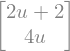

In [6]:
u,v = symbols("u v")
r_L = Matrix([2,0]) + Matrix([2,4]) * u
r_L

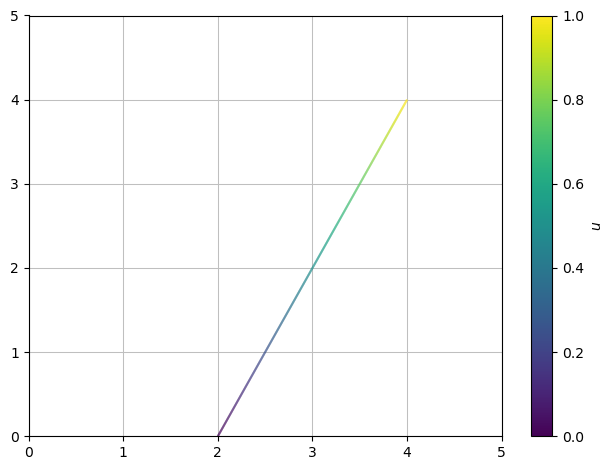

In [7]:
dtuplot.plot_parametric(*r_L, (u,0,1), xlim=(0,5), ylim=(0,5)) # *-tegnet foran r_l er vigtig at huske når man plotter parametriske kurver

Vi kan ofte gøre livet lidt nemmere, når vi skal parametrisere plane områder ved brug af linjestykker. 
Lad os kigge på to eksempler:

### Eksempel

Vi skal parametrisere området i planen begrænset af linjerne:  

$y = 1-x$  
$y = 2x+1$  
$x=2$  

som beskrevet matematisk er

\begin{equation*}
  \Omega:=\Bigl\{(x,y) \in \mathbb{R}^2\ \mid 0 \leq x \leq 2 \, \wedge \, 1 - x\leq y \leq 2x+1\Bigr\}.
\end{equation*}

Lad os se hvordan det område ser ud:

c:\Users\chris\.conda\envs\DTUMisc\Lib\site-packages\spb\series.py:2255: UserWarning: The provided expression contains Boolean functions. In order to plot the expression, the algorithm automatically switched to an adaptive sampling.


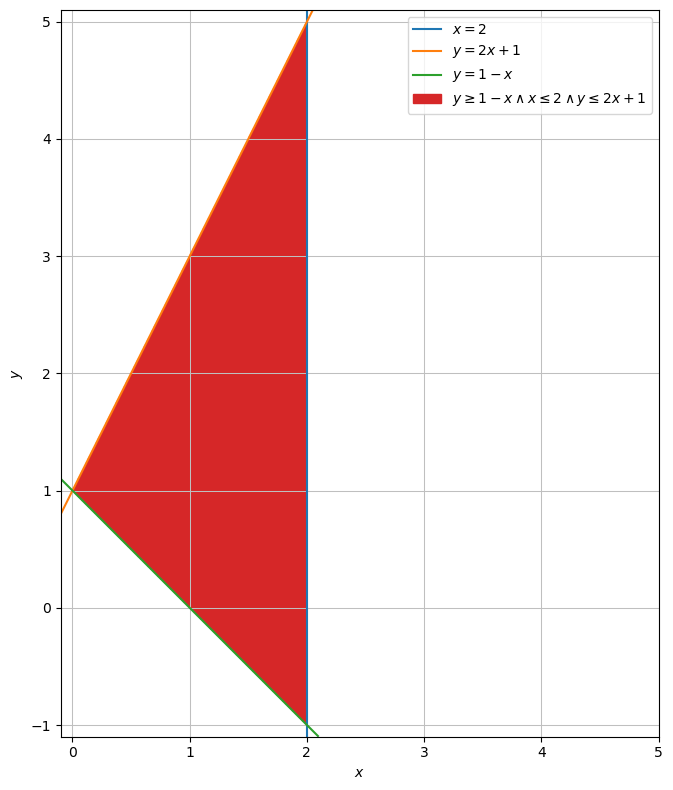

In [8]:
x,y = symbols("x y")
område = dtuplot.plot_implicit(Eq(x,2),Eq(y,2*x+1),Eq(y,1-x),(x <= 2) & (y <= 2*x+1) & (y >= 1-x),(x,-0.1,5),(y,-1.1,5.1),aspect="equal",size=(8,8))

Vi vil gerne parametrisere hele området. Det betyder at alle linjer, der kan udspændes fra grafen $y=-x + 1$ til grafen $y=2x + 1$, skal beskrives.
Vi beskriver punkterne ved bunden af pilen generelt med $A = (u,1-u)$  
Toppen beskriver vi generelt med $B = (u,2u+1)$  
Derfor er retningsvektoren $AB$ beskrevet ved 

\begin{equation*}
  B-A = \begin{bmatrix} u - u \\ 2u+1 - (1-u) \end{bmatrix} = \begin{bmatrix} 0 \\ 3u \end{bmatrix}
\end{equation*}

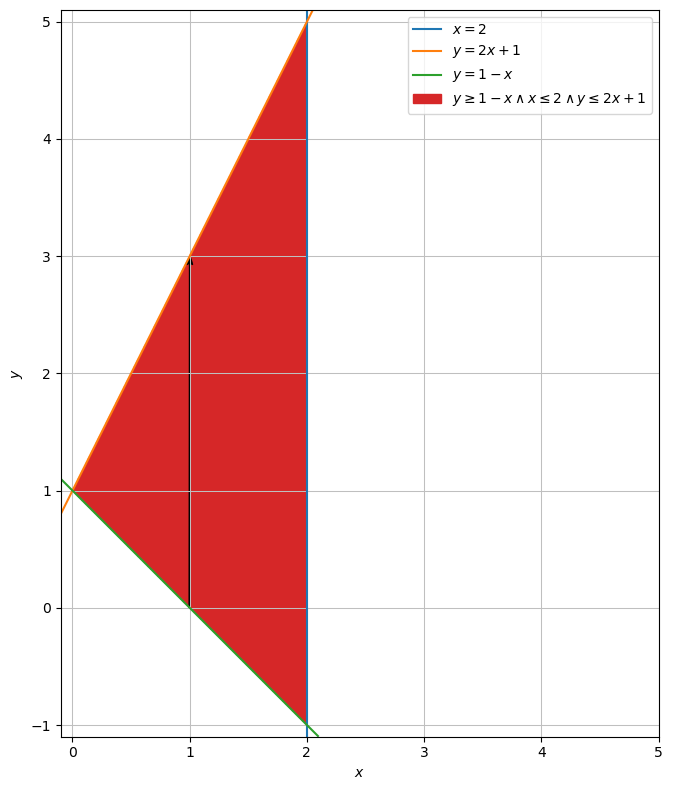

In [9]:
AB = dtuplot.quiver(Matrix([1,0]),Matrix([0,3]),show=False,rendering_kw = {"color" : "black"})

område.extend(AB)
område.show()

Vi kan så parametrisere et givet linjestykke mellem to punkter på toppen og bunden på følgende måde

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} u \\ 1-u \end{bmatrix} + v\begin{bmatrix} 0 \\ 3u \end{bmatrix}, \,
v \in [0,1].
\end{equation*} 

Hvis vi vælger et $u$, der løber i intervallet $[0,2]$, så vil vi gennemløbe alle linjerne fra venstre til højre, og på den måde dække hele trekanten.  
Så hele område kan parametriseres som:

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} u \\ 1-u +3vu\end{bmatrix}, \quad
u \in [0,2], \, v \in [0,1]; 
\end{equation*}

c:\Users\chris\.conda\envs\DTUMisc\Lib\site-packages\spb\backends\matplotlib\matplotlib.py:591: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.


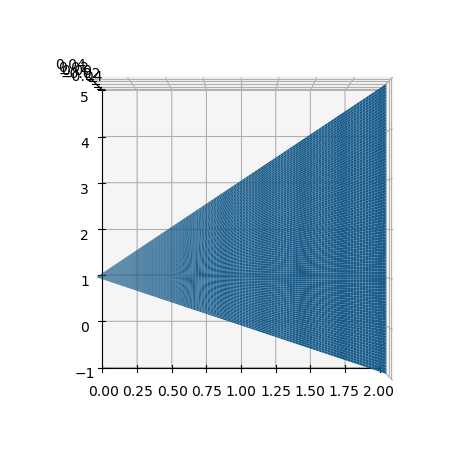

In [10]:
dtuplot.plot3d_parametric_surface(u,1-u+3*u*v,0,(u,0,2),(v,0,1),camera={"elev":90, "azim":-90})
## Man kan ikke plotte planer i 2d, så vi bruger "camera" argumentet til at kigge på plottet fra oven

## Områder begrænset af cirkler

Vi vil nu parametrisere enhedscirkelskiven med centrum $(2,1)$.
Fordi vi godt ved, hvordan en cirkel ser ud, så vi gå direkte efter af finde det linjestykke vi gerne vil parametrisere.

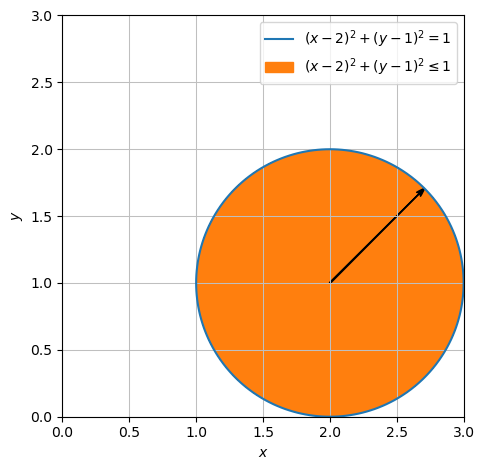

In [11]:
cirkel = dtuplot.plot_implicit(Eq((x-2) ** 2 + (y-1) ** 2,1),((x-2) ** 2 + (y-1) ** 2 <=1),(x,0,3),(y,0,3), aspect = 'equal',show=False)
AB = dtuplot.quiver(Matrix([2,1]),Matrix([cos(pi /4),sin(pi / 4)]),rendering_kw={"color":"black"}, show=False)
# cirkel.extend(AB)
(cirkel + AB).show()

Vi vil nu parametrisere enhver linje, der går fra centrum til et punkt på cirkelskivens rand. Dette gøres på følgende måde. Vores $A$ er nu $(2,1)$, vores $B$ er $(2 + \cos(u), 1 + \sin(u))$, så vores retningsvektor $AB$ er derfor $\begin{bmatrix} \cos(u) \\ \sin(u) \end{bmatrix}$. Denne specifikke linje parametriseres derfor som:

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix} + v \begin{bmatrix} \cos(u) \\ \sin(u) \end{bmatrix},\quad \text{for } \ v \in [0,1]
\end{equation*}

Hvis vi lader $u$ gennemløbe intervallet $[0,2 \pi]$, så kan vi få alle linjerne mellem centrum og randen, og på den måde få hele cirklen med. Så fladen parametriseres:

\begin{equation*} 
r_C(u) = \begin{bmatrix} 2 + v \cos(u) \\ 1 + v \sin(u) \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix},\quad \text{for } u \in [0,2\pi],\ v \in [0,1]
\end{equation*}

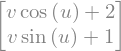

In [12]:
rC = Matrix([2,1]) + v * Matrix([cos(u),sin(u)])
rC

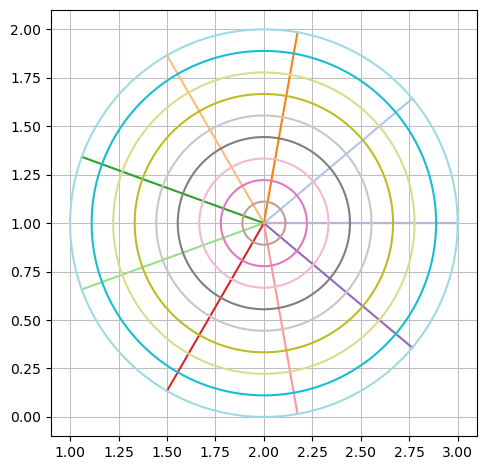

In [13]:
dtuplot.plot_parametric_region(*rC, (u,0,2*pi), (v,0,1), aspect="equal")

For hver af disse områder i planen kan et planintegral for en given funktion udregnes.

## Planintegralet

Givet funktionen 

\begin{equation*}
f(x,y) = 2xy
\end{equation*}

In [14]:
f = lambda x,y: 2 * x * y
f(x,y)

ønsker vi finde planintegralet af $f$ over området begrænset af vores cirkel, altså $\int_C f(x,y)\; \mathrm{d}\pmb{x}$.

NB:  Ved denne parameterfremstilling afbildes det akseparallelle kvadrat $[0, 2\pi] \times [0, 1]$ i $(u,v)$-planen over i den cirkel vi integrerer over i $(x,y)$-planen.

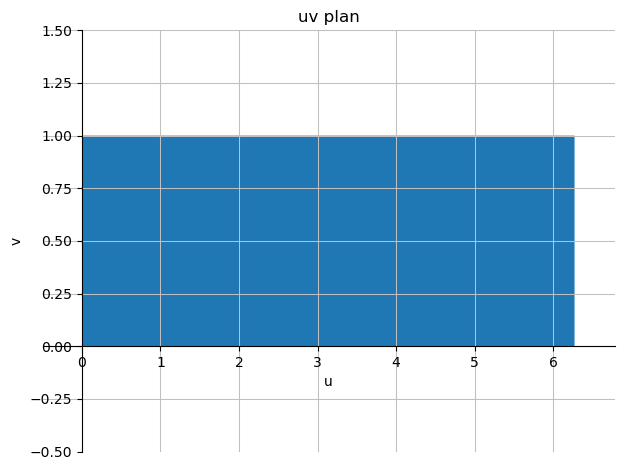

afbilledes i over


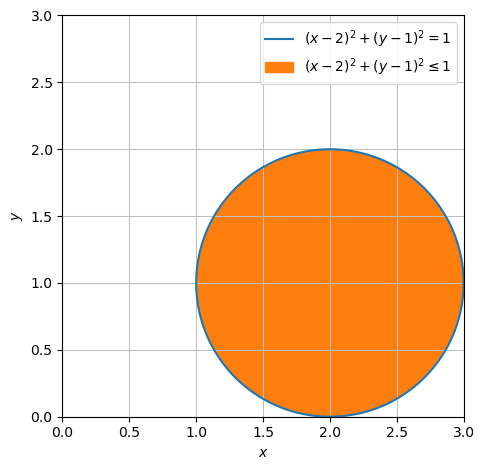

In [15]:
dtuplot.plot_implicit(((x < 2*pi) & (x > 0) & (y > 0) & (y < 1)), (x, -0.5, 2*pi + 0.5), (y, -0.5,1.5),
                      title="uv plan", xlabel="u", ylabel="v", axis_center='auto')

print("afbilledes i over")

cirkel.show()

Nu får vi brug for absolut-værdien af Jacobi-determinanten, som lokalt måler, hvor meget $(u,v)$-parameterområdet deformeres, når det udsættes for afbildningen $\boldsymbol r_C$. Og da der nu er flere variable og afledede, opstiller vi først Jacobimatricen:

\begin{equation*}
\boldsymbol{J}_{r_C} = \left[\begin{matrix} \vdots & \vdots \\ \frac{\partial \boldsymbol r(u,v)}{\partial u} &  \frac{\partial \boldsymbol r(u,v)}{\partial v} \\  \vdots & \vdots \end{matrix}\right] = \left[\begin{matrix}\nabla(2 + v\cos\left(u \right))^T\\ \nabla(1 + v\cos\left(u \right))^T\end{matrix}\right]
\end{equation*}

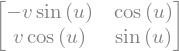

In [16]:
JacobiM = Matrix.hstack(rC.diff(u), rC.diff(v))
JacobiM

Nu kan vi finde absolut-værdien af Jacobi-determinanten $|\det(\boldsymbol J_{r_C})|$ ved

In [17]:
Jacobiant = abs(det(JacobiM)).simplify()
Jacobiant

Integralet af $f$ over $C$ er da ifølge Transformationsætningen givet ved:

\begin{equation*}
  \int_C f(x,y)\; \mathrm{d}\pmb{x} = \int_{0}^{1} \int_{0}^{2\pi} f(\boldsymbol r_C(u,v))\cdot|\det (\boldsymbol J_{r_C}) |\;\mathrm{d}u\mathrm{d}v = \int_{0}^{1} \int_{0}^{2\pi} f(2+v\cos(u),1+v\sin(u))\cdot|v|\; \mathrm{d}u \mathrm{d}v
\end{equation*}

In [18]:
integrate(f(*rC) * Jacobiant,(u,0,2*pi),(v,0,1))

## Rumintegral: Vægten af en kugle i $\mathbb{R}^3$

Lad 

\begin{equation*}
\Omega = \left\{\boldsymbol{x} \in \mathbb{R}^3 \:|\: ||\boldsymbol{x}||_2 \leq 1 \right\}
\end{equation*}

Altså beskriver $\Omega$ en enheds kugle i $\mathbb{R}^3$. Lad nu

\begin{equation*}
f:\mathbb{R}^3 \to \mathbb{R}, \quad f(\boldsymbol{x}) = 1
\end{equation*}

beskrive en konstant "massetæthedsfunktion" (alle dele af kuglen antages altså at veje lige meget). Vi ønsker at bestemme vægten af kuglen beskrevet af $\Omega$ altså skal vi bestemme

\begin{equation*}
M =\int_{\Omega} f\; \mathrm{d}\pmb{x}
\end{equation*}

Dette kræver at vi først og fremmest skal bestemme en parametrisering for kuglen, og den tilhørende jacobi-determinant. Den nemmeste ville være at benytte sfæriske koordinater som beskrevet i bogen, men vi vil prøve at arbejde os frem til en parametrisering ud fra hvad vi ved om parametriseringen af a cirklen.

### Parametrisering af en kugle

In [19]:
u,v,w = symbols('u v w', real = True)

Vi vil anvende den tilgang at en kugle kan beskrives som en cirkel i xz-planen roteret 180 grader om z-aksen. Cirklen af parametriseret således:

\begin{equation*}
\boldsymbol{r}_{cirkel} = \begin{bmatrix} \cos(u)\\ 0\\ \sin(u) \end{bmatrix}, \quad u\in[0,2\pi]
\end{equation*}

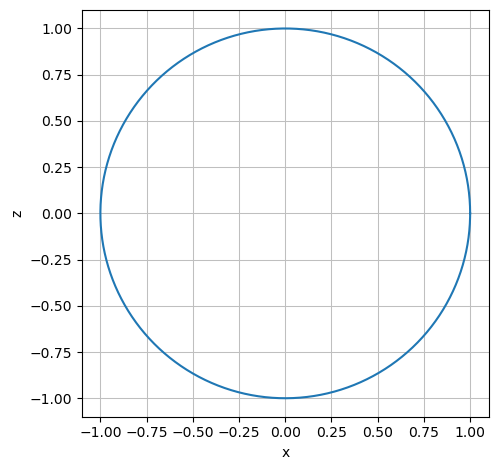

In [20]:
r_circle = Matrix([cos(u), 0, sin(u)])

dtuplot.plot_parametric(r_circle[0], r_circle[2], (u,0,2*pi), use_cm=False,aspect="equal", xlabel = 'x', ylabel = 'z')

Herefter kan cirklen roteres om z-aksen vha rotationsmatricen

\begin{equation*}
R_z = \left[\begin{matrix}\cos{\left(v \right)} & - \sin{\left(v \right)} & 0\\\sin{\left(v \right)} & \cos{\left(v \right)} & 0\\0 & 0 & 1\end{matrix}\right], \quad v\in[0,\pi]
\end{equation*}

Dette vil altså give en sfære med radius 1.

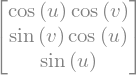

In [21]:
Rz = Matrix([[cos(v), -sin(v), 0], [sin(v), cos(v), 0], [0, 0, 1]])

r_sphere = simplify(Rz * r_circle)
r_sphere

Tilsidst kan vi opnå en solid kugle ved at indføre parameteren $w \in [0,1]$, som sørger for at vi kan ramme alle radier mellem 0 og 1. Altså er den parameterfremstillingen for kuglen:

\begin{equation*}
\boldsymbol{r}_{ball} = \left[\begin{matrix}w\cos{\left(u \right)} \cos{\left(v \right)} \\ w\cos{\left(u \right)}\sin{\left(v \right)}\\ w\sin{\left(u \right)}\end{matrix}\right], \quad u\in[0,2\pi], v\in[0,\pi], w\in[0,1]
\end{equation*}

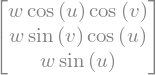

In [22]:
r_ball = r_sphere * w
r_ball

Dette kan visualiseres ved at kigge på $\boldsymbol{r}_{ball}$ med forskellige værdier for $w$

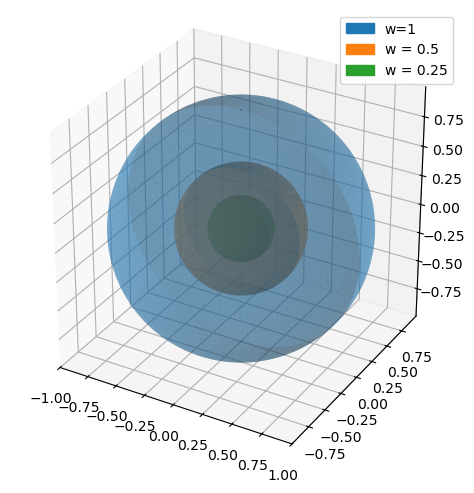

In [23]:
big_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,1), (u, 0, 2*pi), (v, 0, pi), aspect = 'equal', label = 'w=1', rendering_kw = {'alpha': 0.4,}, show = false)
half_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,0.5), (u, 0, 2*pi), (v, 0, pi),label ='w = 0.5', rendering_kw = {'alpha': 0.5}, show = False)
quarter_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,0.25), (u, 0, 2*pi), (v, 0, pi),label ='w = 0.25', show = False)
(big_ball + half_ball + quarter_ball).show()

### Jacobi-determinanten og tæthedsfunktion

Jacobi-determinanten $\det(\boldsymbol{J}_{r_{ball}})$ findes ved 

\begin{equation*}
\boldsymbol{J}_{r_{ball}} = \left[\begin{matrix} \vdots & \vdots & \vdots \\ \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial u} &  \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial v} & \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial w} \\  \vdots & \vdots & \vdots  \end{matrix}\right] = \left[\begin{matrix}\nabla(w\cos{\left(u \right)} \cos{\left(v \right)})^T\\ \nabla(w \cos{\left(u \right)}\sin{\left(v \right)})^T\\ \nabla(w\sin{\left(u \right)})^T\end{matrix}\right]
\end{equation*}

Dette kan let gøres med `dtumathtools`, hvor vi medtager absolut-værdien:

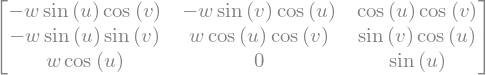

In [24]:
J_ball = r_ball.jacobian([u,v,w])
J_ball

In [25]:
Jacobiant = abs(det(J_ball)).simplify()
Jacobiant

Tæthedsfunktionen er i dette tilfælde 1-funktionen og derfor ikke nødvendig at medregne, men lad os definere den for formalitetens skyld

In [26]:
f = lambda x,y,z: 1

### Bestemmelse af integralet

Nu kan vi bestemme vægten af kuglen ved

\begin{equation*}
M =\int_{\Omega} f\ \mathrm{d}\pmb{x} = \int_{0}^{1} \int_{0}^{\pi}\int_{0}^{2\pi} f(\boldsymbol{r}_{ball})J_{r_{ball}} \;dudvdw
\end{equation*}

Først definerer og simplificerer vi integranden

In [27]:
integrand = (f(*r_ball) * Jacobiant).simplify()
integrand

In [28]:
M = integrate(integrand, (u, 0, 2*pi), (v, 0, pi), (w, 0, 1))
M

Bemærk at $M$ er lig med volumet af en kugle med radius 1, hvilket giver god mening da alle punkter er blevet tildelt vægten $1$.

### En anden tæthedsfunktion

Lad nu 

\begin{equation*}
f_1 : \mathbb{R}^3 \to \mathbb{R}, \quad f_1(\boldsymbol{x}) = 2||x||_2
\end{equation*}

beskrive en ny tæthedsfunktion.

Lad os bestemme

\begin{equation*}
M_1 = \int_{\Omega} f_1 d\pmb{x}
\end{equation*}

In [29]:
f1 = lambda x,y,z: 2*sqrt(x**2 + y**2 + z**2)

In [30]:
integrand = (f1(*r_ball) * Jacobiant).simplify()
integrand

In [31]:
M1 = integrate(integrand, (u, 0, 2*pi), (v, 0, pi), (w, 0, 1))
M1